In [ ]:
# dimensionality reduction and unsupervised clustering for EELS-SI
# Jinseok Ryu (jinseuk56@gmail.com)
# https://doi.org/10.1016/j.ultramic.2021.113314

In [1]:
import tkinter.filedialog as tkf
from drca import DR_assisted_CA
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Cambria'

In [2]:
file_adr = []

In [3]:
file_adr.extend(tkf.askopenfilenames())

In [ ]:
%matplotlib inline

In [4]:
run_SI = DR_assisted_CA(file_adr, dat_dim=3, dat_unit='eV', cr_range=[1.0, 3.0, 0.01], rescale=False, DM_file=True)

Energy loss axis
(80, 80, 200)


In [5]:
# binning (optional)
bin_y = 1 # binning size (height)
bin_x = 1 # binning size (width)
str_y = 1 # stride height-direction
str_x = 1 # stride width-direction

run_SI.binning(bin_y, bin_x, str_y, str_x, offset=0, rescale=True)

(80, 80, 200)
(80, 80, 200)
[[ 80  80 200]]


In [6]:
# prepare the input dataset (flatten and merge)
run_SI.make_input(min_val=0.0, max_normalize=True)

(6400, 200)
0.0 1.0
0.0 1.0


Epoch 10 reached after 0.021 seconds, error: 179.279292
Epoch 20 reached after 0.033 seconds, error: 172.996715
Epoch 30 reached after 0.044 seconds, error: 169.941471
Epoch 40 reached after 0.055 seconds, error: 168.288048
Epoch 50 reached after 0.065 seconds, error: 167.482392
Epoch 60 reached after 0.076 seconds, error: 167.036532
Epoch 70 reached after 0.087 seconds, error: 166.763364
Epoch 80 reached after 0.098 seconds, error: 166.584063
Epoch 90 reached after 0.112 seconds, error: 166.460557
Epoch 100 reached after 0.125 seconds, error: 166.371871
Epoch 110 reached after 0.139 seconds, error: 166.306370
Epoch 120 reached after 0.152 seconds, error: 166.256896


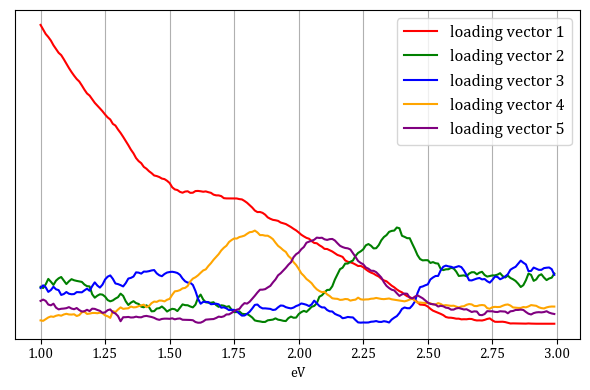

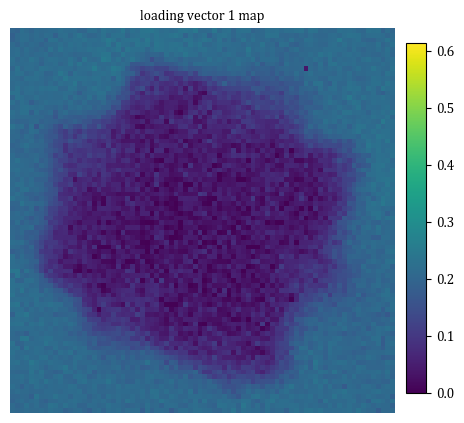

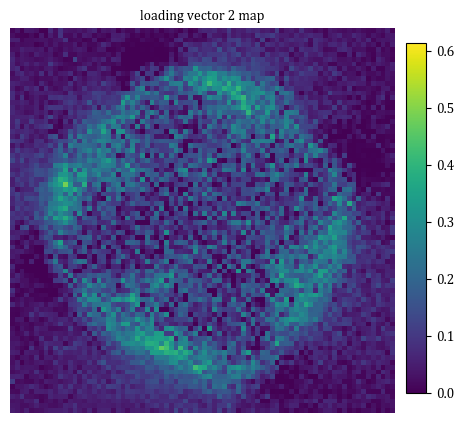

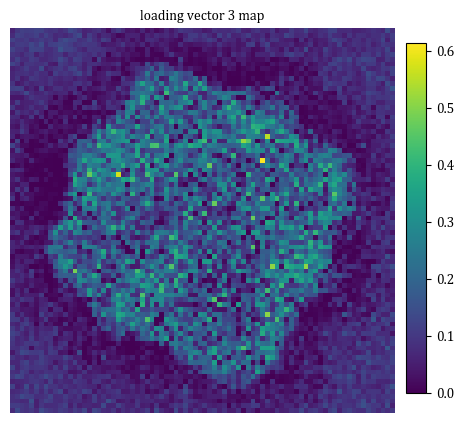

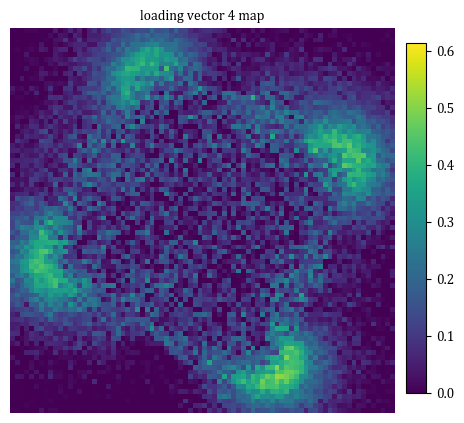

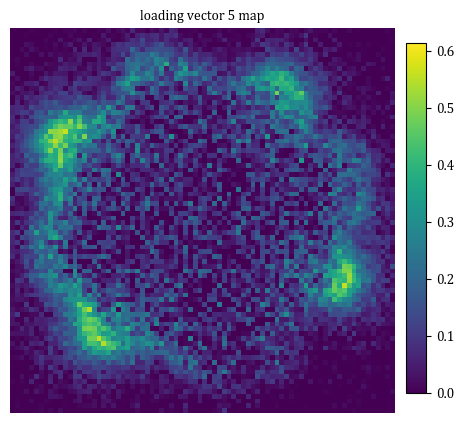

In [7]:
# first decomposition (three options: NMF, PCA, CAE)
run_SI.ini_DR(method="nmf", num_comp=5, result_visual=True)

1 perplexity 30.0 finished
0.26 min have passed


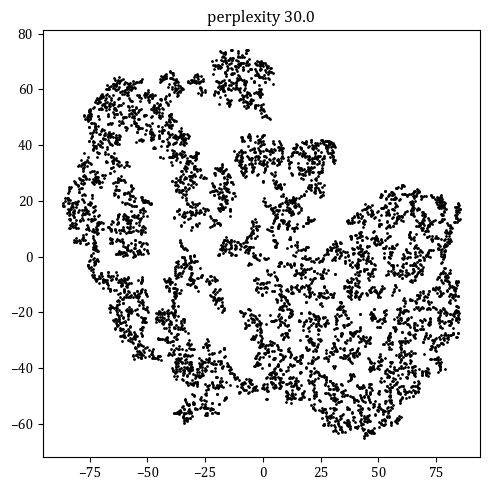

2 perplexity 40.0 finished
0.55 min have passed


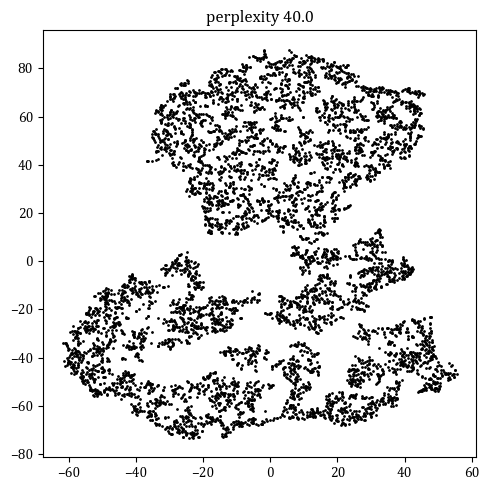

3 perplexity 50.0 finished
0.85 min have passed


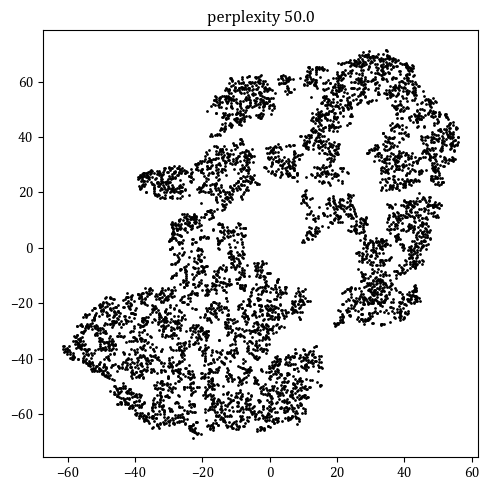

In [8]:
# second decomposition (t-SNE)
run_SI.aug_DR(2, method="tsne", perplex=[30, 40, 50])

(6400, 2)


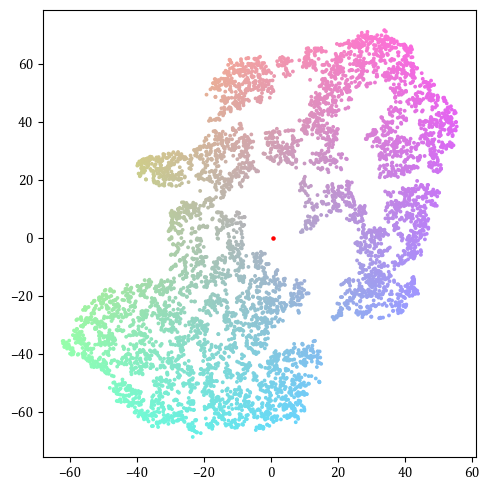

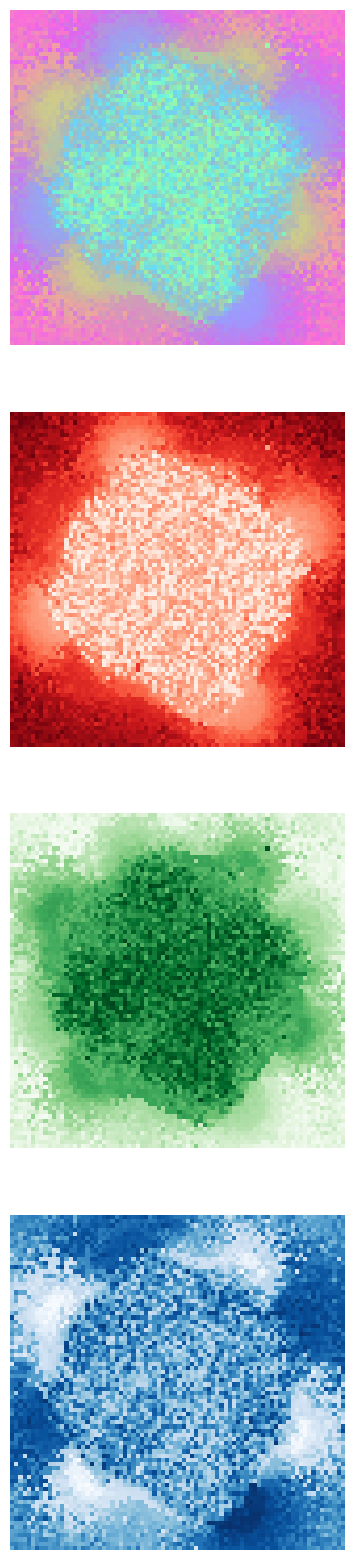

In [9]:
# select and quick-check the final DR space for cluster analysis
run_SI.prepare_clustering(sel_ind=3, quick_visual=True)

interactive(children=(FloatText(value=0.05, description='min. # of samples in a neighborhood', style=Descripti…

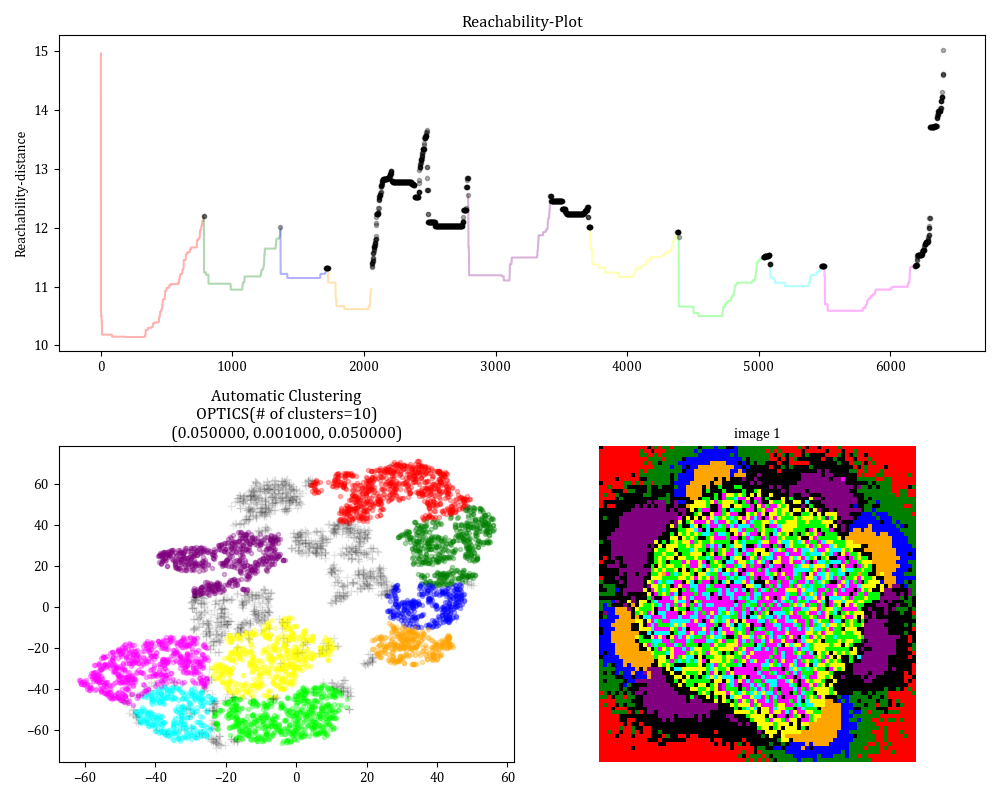

In [10]:
# clustering
%matplotlib widget
run_SI.cluster_analysis(method="optics")

In [11]:
%matplotlib inline

[-1  0  1  2  3  4  5  6  7  8]
[1353  780  582  346  332  625  660  644  389  689]


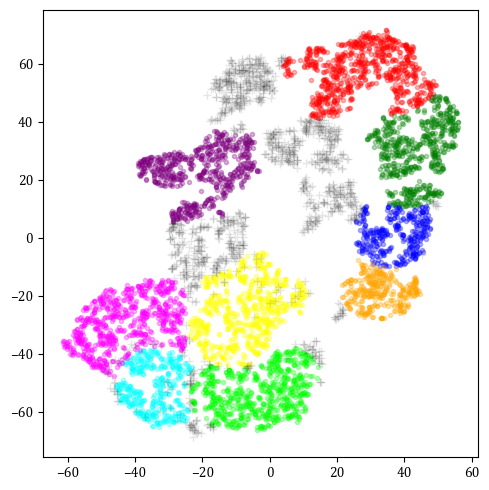

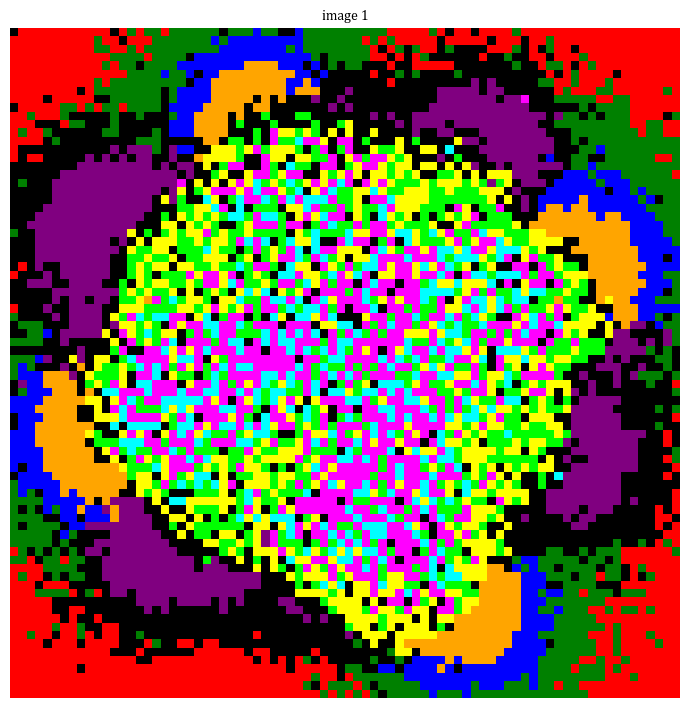

number of pixels in the label -1 cluster: 1353
number of pixels in the label 0 cluster: 780
number of pixels in the label 1 cluster: 582
number of pixels in the label 2 cluster: 346
number of pixels in the label 3 cluster: 332
number of pixels in the label 4 cluster: 625
number of pixels in the label 5 cluster: 660
number of pixels in the label 6 cluster: 644
number of pixels in the label 7 cluster: 389
number of pixels in the label 8 cluster: 689


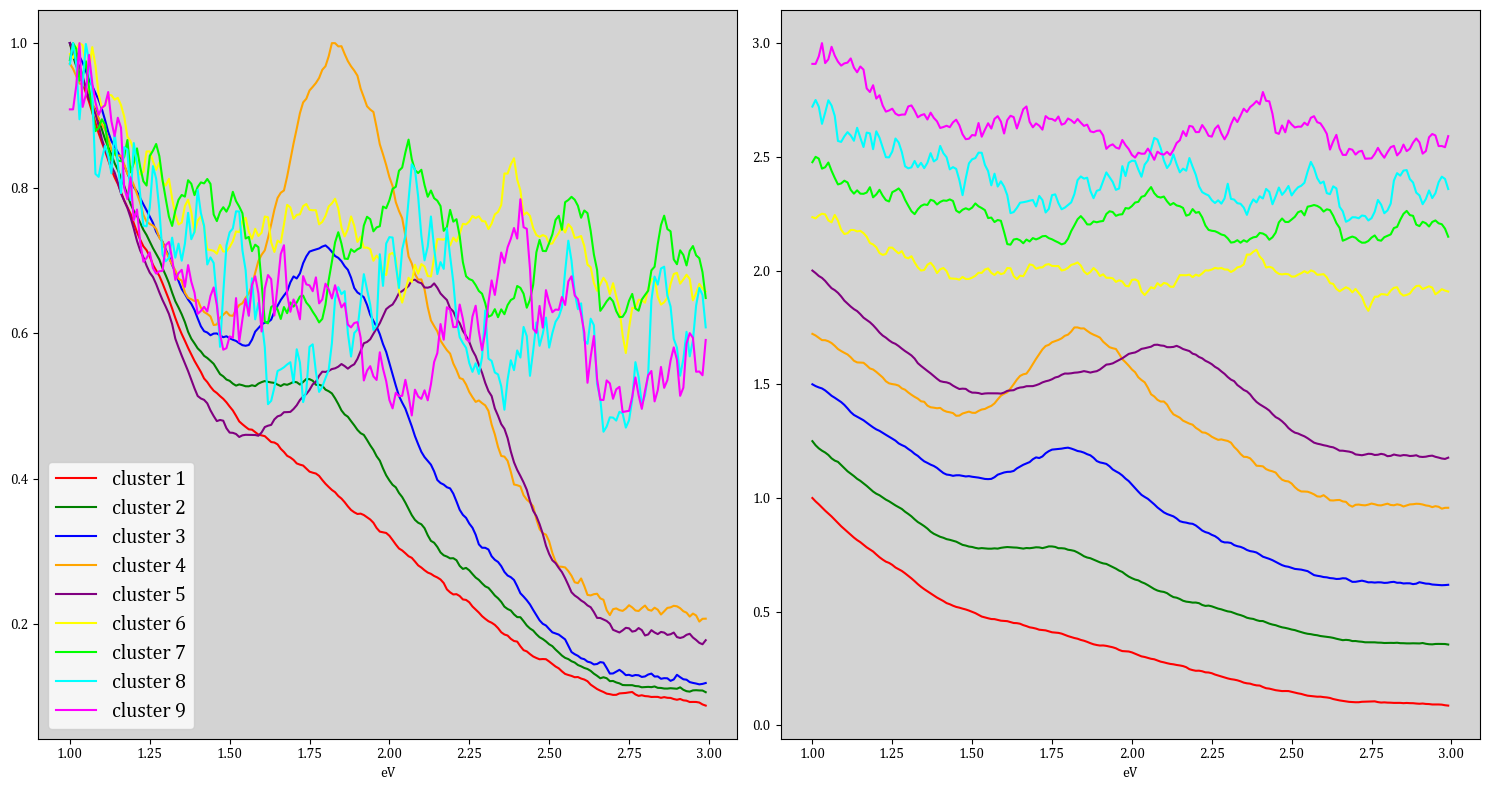

In [13]:
# clustering results (tf_map = True/False map for each cluster)
run_SI.clustering_result(tf_map=False, normalize='max', log_scale=False)